# Assignment 2

In [1]:
## Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Step 1: Visualizing the Data

First I import the data and display it

In [2]:
df = pd.read_csv('Software-Engineer-Salaries.csv')
df.head()

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)


*Then I output the datatypes of each column should I need to know it later on*

In [3]:
df.dtypes

Company           object
Company Score    float64
Job Title         object
Location          object
Date              object
Salary            object
dtype: object

### Creating a histogram of company scores


<Axes: xlabel='Company Score', ylabel='Count'>

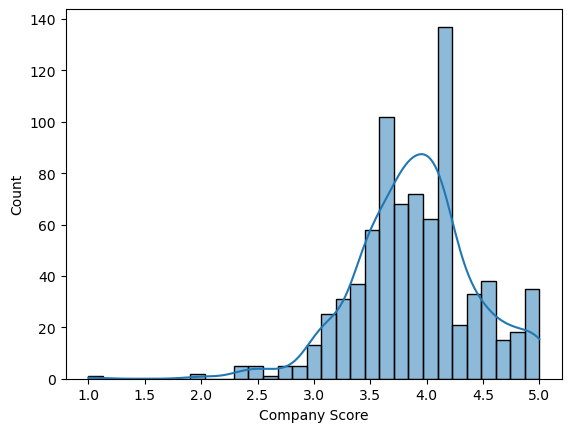

In [4]:
sb.histplot(data=df, x='Company Score', kde=True)

From this I observed that the majority of company scores in the dataset are between 3.5 and 4.5 stars, with an overall left skew

### Creating a boxplot to observe outliers in the dataset

<Axes: xlabel='Company Score'>

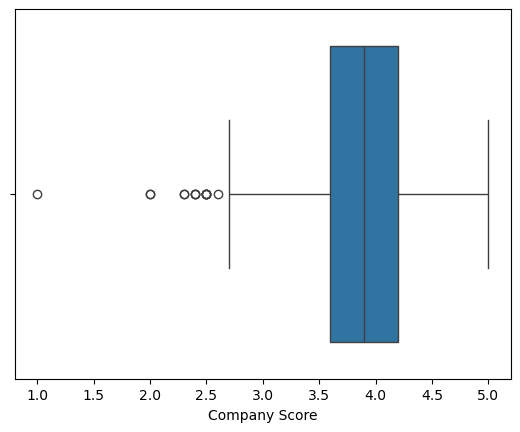

In [5]:
sb.boxplot(data=df, x='Company Score')

From this I can see that there are about five outliers in the dataset, with 1 being a rather extreme outlier

### Observing if location of the job listing had an impact on the company score

<Axes: xlabel='Location', ylabel='Company Score'>

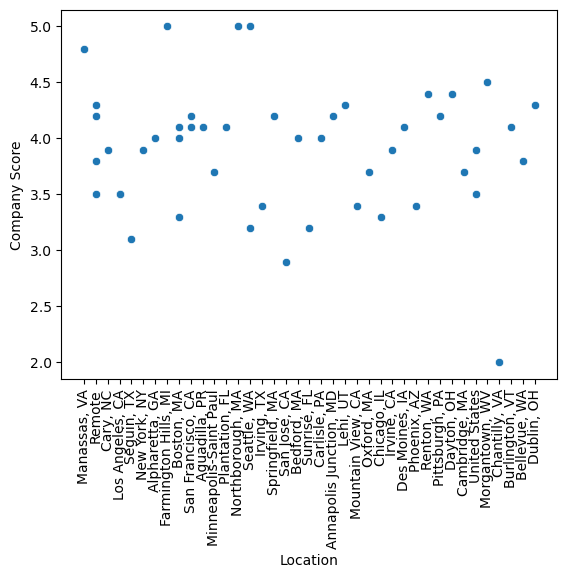

In [6]:
plt.xticks(rotation=90)
sb.scatterplot(data=df.head(50), x='Location', y='Company Score')

The scatterplot makes it appear that the location has little affect on the score the company recieved

## Step 2: Data cleaning


### Identifying missing values

<Axes: >

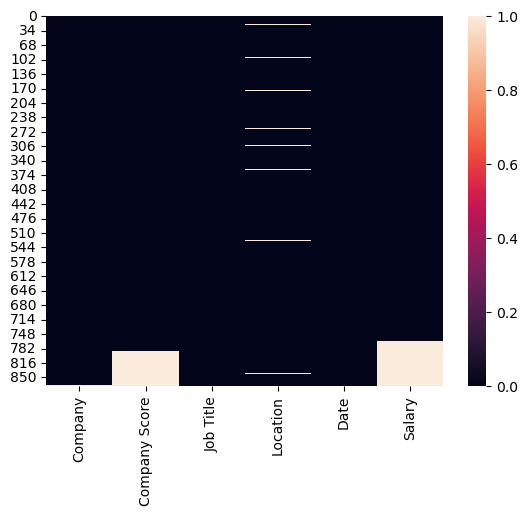

In [7]:
sb.heatmap(data=df.isnull())

**This shows that salary and company score have the most missing values**

In [8]:
df.isnull().sum()

Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64

In [9]:
temp = pd.DataFrame(df.isnull().sum())
temp.reset_index(inplace=True)
temp.columns = ['Column_Name', 'Missing_Values']
temp['Missing_Values'] = temp['Missing_Values']/ df.shape[0] * 100
temp.query('Missing_Values > 0')

,Column_Name,Missing_Values
0,Company,0.229885
1,Company Score,9.310345
3,Location,1.494253
5,Salary,12.183908


**Now I replace the missing values with the mean of Company Score**

In [10]:
df['Company Score'].fillna(df['Company Score'].mean(), inplace=True)
df.isnull().sum()

/tmp/ipykernel_71423/827626647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company Score'].fillna(df['Company Score'].mean(), inplace=True)


Company            2
Company Score      0
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64

**Now I see that Salary has the most missing values left**

In [11]:
import re

def extract_number(string):
    """Extracts the numeric part of a string."""
    return re.findall(r'\d+', string)

def scale_hourly_to_yearly(hourly_rate):
    """Scales an hourly rate to an annual salary based on 40 hours/week, 52 weeks/year."""
    return (hourly_rate * 40 * 52)/1000

def split_salary(salary):
    min_salary = 0
    max_salary = 0
    data_source = ''
    
    if 'hour' in salary.lower():
        
        hourly_rate = int(extract_number(salary)[0])
        min_salary = scale_hourly_to_yearly(hourly_rate)
        max_salary = min_salary
        data_source = 'Hourly to Yearly conversion'
    else:
        
        temp = salary.split('(')
        if len(temp) == 2:
            data_source = temp[1]
            temp = temp[0].split('-')
            if len(temp) == 2:
                min_salary = int(extract_number(temp[0])[0])
                max_salary = int(extract_number(temp[1])[0])
    
    return min_salary, max_salary, data_source


df['Salary'] = df['Salary'].astype(str)
df['Salary'] = df.apply(lambda x: split_salary(x.Salary), axis=1)


**Here I extract the important information for computing the average salary, as well as taking care to convert the job listings that are in hourly to yearly to conform to the majority of the dataset** 

In [12]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,"(68, 94, Glassdoor est.))"
1,Workiva,4.3,Software Support Engineer,Remote,2d,"(61, 104, Employer est.))"
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,"(95, 118, Glassdoor est.))"
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,"(97, 145, Employer est.))"
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,"(85, 108, Glassdoor est.))"


**To make comparison easier, I added the high and low estimates and divided them to get an average of the range**

In [13]:
def extract_and_average(salary):
    salary = str(salary)
    numbers = salary.split('(')[1].split(')')[0].split(', ')
    num1, num2 = float(numbers[0]), float(numbers[1])
    return (num1 +num2) /2

df['Average of Salary Range'] = df['Salary'].apply(extract_and_average)
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Average of Salary Range
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,"(68, 94, Glassdoor est.))",81.0
1,Workiva,4.3,Software Support Engineer,Remote,2d,"(61, 104, Employer est.))",82.5
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,"(95, 118, Glassdoor est.))",106.5
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,"(97, 145, Employer est.))",121.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,"(85, 108, Glassdoor est.))",96.5


**I noticed that some zero values were copied over from salary, so i replaced those with average values. I also did this with null values**

In [14]:
df['Average of Salary Range'].fillna(df['Average of Salary Range'].mean(), inplace=True)
df['Average of Salary Range'] = df['Average of Salary Range'].mask(df['Average of Salary Range'] == 0, df['Average of Salary Range'].mean())

/tmp/ipykernel_71423/4150942881.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average of Salary Range'].fillna(df['Average of Salary Range'].mean(), inplace=True)


**I wanted to see what the dataframe looked like after a bit of data wrangling**

In [15]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Average of Salary Range
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,"(68, 94, Glassdoor est.))",81.0
1,Workiva,4.3,Software Support Engineer,Remote,2d,"(61, 104, Employer est.))",82.5
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,"(95, 118, Glassdoor est.))",106.5
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,"(97, 145, Employer est.))",121.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,"(85, 108, Glassdoor est.))",96.5


**I wanted to remind myself what null values remained**

In [16]:
df.isnull().sum()

Company                     2
Company Score               0
Job Title                   0
Location                   13
Date                        0
Salary                      0
Average of Salary Range     0
dtype: int64

**Finally, I dropped the null company and location entries**

In [17]:
df.dropna(subset=['Location'], inplace=True)
df.dropna(subset=['Company'], inplace=True)

In [18]:
df.isnull().sum()

Company                    0
Company Score              0
Job Title                  0
Location                   0
Date                       0
Salary                     0
Average of Salary Range    0
dtype: int64

### Cleaning Steps
- I Identified missing values
- I chose to remedy missing values by inserting the average for that column when it was possible to compute it, as this shouldn't have a dramatic affect on the descriptive statistics of the dataset. For qualitative variables such as Company and Location, I chose to drop it.
- For Company Score, I was simply able to insert the mean into missing values without any additional information, as pandas already identified it as a float.
- For salary it was slighly more complicated, as I had to convert the datatype to a string before performing string operations on it
- I was then able to apply a lambda function to it to extract the useful information from it, such as the low number and the high number in the range, as well as where the estimate came from
- If the salary was given in an hourly format, I converted it to yearly by multiplying by the average working hours, then dividing by 1000, as the standard salary numbers were in thousands
- Finally, I wanted to normalize the data to make it easier to compare , so i created a column called _'Average of Salary Range'_, where i inserted the mean of the range given, but left the original salary column untouched to preserve information about where the estimate came from

## Step 3: Summary Statistics

In [19]:
variance_company_score = df['Company Score'].var()
variance_average_of_salary_range = df['Average of Salary Range'].var()
df.describe()


,Company Score,Average of Salary Range
count,855.000000,855.000000
mean,3.894894,126.865036
std,0.501052,43.805514
min,1.000000,6.500000
25%,3.600000,102.000000
50%,3.895311,111.500000
75%,4.100000,142.500000
max,5.000000,490.000000


In [20]:
print(variance_average_of_salary_range)
print(variance_company_score)

1918.9230282567976
0.25105318838695223


In [21]:
df.nunique()

Company                    640
Company Score               31
Job Title                  535
Location                   329
Date                        31
Salary                     650
Average of Salary Range    264
dtype: int64

In [22]:
df['Average of Salary Range'].value_counts()[:10].index.tolist()

/tmp/ipykernel_71423/1602332158.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df['Average of Salary Range'].value_counts()[:10].index.tolist()


[110.7212183908046,
 99.5,
 95.0,
 135.0,
 120.0,
 130.0,
 112.5,
 115.5,
 80.0,
 106.0,
 117.5,
 106.5,
 96.5,
 102.5,
 115.0,
 107.5,
 132.5,
 108.0,
 104.0,
 125.0,
 153.5,
 121.0,
 126.0,
 100.0,
 90.0,
 167.5,
 97.5,
 114.0,
 103.5,
 122.5,
 111.0,
 133.0,
 118.0,
 176.5,
 83.0,
 145.0,
 103.0,
 107.0,
 87.0,
 160.0,
 111.5,
 188.0,
 86.0,
 91.5,
 138.5,
 147.5,
 116.5,
 98.5,
 132.0,
 102.0,
 130.5,
 105.5,
 82.5,
 168.0,
 98.0,
 101.5,
 89.5,
 137.5,
 95.5,
 125.5,
 101.0,
 123.5,
 112.0,
 94.0,
 82.0,
 88.5,
 154.0,
 150.0,
 89.0,
 94.5,
 99.0,
 91.0,
 128.5,
 200.0,
 92.5,
 108.5,
 85.5,
 129.5,
 104.5,
 167.0,
 97.0,
 86.5,
 90.5,
 124.0,
 151.5,
 127.0,
 226.0,
 105.0,
 272.5,
 181.5,
 166.4,
 190.0,
 166.5,
 139.5,
 170.0,
 110.5,
 120.5,
 138.0,
 185.0,
 83.2,
 78.0,
 119.0,
 121.5,
 144.0,
 126.5,
 162.0,
 163.5,
 134.5,
 96.0,
 179.0,
 220.0,
 124.8,
 145.5,
 195.5,
 192.5,
 165.0,
 109.5,
 149.0,
 197.0,
 77.5,
 216.0,
 161.5,
 80.5,
 162.5,
 110.0,
 133.5,
 109.0,
 83.

In [23]:
df['Company Score'].mode()


0    4.1
Name: Company Score, dtype: float64

In [24]:
df['Average of Salary Range'].median()

111.5

In [27]:
df['Average of Salary Range'].mode()

0    110.721218
Name: Average of Salary Range, dtype: float64

In [25]:
df['Company Score'].median()

3.895310519645121

### Insight

| Statistic     | Company Score | Average of Salary Range |
|---------------|---------------|-------------------------|
| count         | 855.000000    | 855.000000              |
| mean          | 3.894894      | 126.865036              |
| std           | 0.501052      | 43.805514               |
| min           | 1.000000      | 6.500000                |
| 25%           | 3.600000      | 102.000000              |
| 50%           | 3.895311      | 111.500000              |
| 75%           | 4.100000      | 142.500000              |
| max           | 5.000000      | 490.000000              |


This revealed to me that the median for _company score_ was quite close to the mean. This was also the case for _Average of Salary Range_, indicating that this dataset is relatively symmetrical. This is further reinforced by the mode of _company score_, as it is only slightly higher than the median of 3.89 at 4.1

**Mode**: _Company Score_ = 4.1

**Mode**: _Average of Salary Range_ = 110.721218

### Unique Value counts

| Company                    | 640 |
|----------------------------|-----|
| Company Score               | 31  |
| Job Title                  | 535 |
| Location                   | 329 |
| Date                        | 31  |
| Salary                     | 650 |
| Average of Salary Range    | 264 |

This showed that the Salary listing and the Company Name tended to be the most unique, which makes since, because every company has a different name, and the salary column had a false level of uniqueness because of different conventions for salary listing, and the specification of where the estimate came from, which is why the uniqueness went down in the _Average of Salary Range_ column

### Step 4: Identifying patterns and relationships


In [26]:
df.corr(method= 'pearson',numeric_only=True)


,Company Score,Average of Salary Range
Company Score,1.000000,0.045178
Average of Salary Range,0.045178,1.000000


### Explanation
This correlation matrix tells me that there is only a very weak positive correlation between the company score and the Salary that the company is offering in their job listing.

## Step 5: Conclusions and Insights

My Analysis highlighted a couple of interesting patterns/trends. The first finding that I found interesting is the grouping of company scores. 50% of all company scores were between *3.6* and *4.1* . Under the assumption that a 3/5 would be considered average, it seems most companies employing software engineers are between good and great, indicating a high degree of employee satisfaction in the Industry currently. Additionally, The Correlation Matrix shows that their is only a slight positive correlation between _Company Score_ and the _Average of Salary Range_. This surprised me, because I was under the assumption that the compensation level of a company played significant role in the level of satisfaction that people who have at their job. Lastly, and perhaps the most surprising to me, is that the most common location in the dataset was **Remote**. This was suprising to me, because I remember within the past year reading a lot of news articles talking about Return to Office mandates, as well the supposed _Death of Remote Work_